In [1]:
import os
os.getcwd()

'/Users/pratikghanekar/Desktop/ML/case study'

In [2]:
#import standard lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to load csv file using pandas features read_csv
df=pd.read_csv('insurance.csv')
df.head()
#here target is insuranceclaim 
#it is classification algo
#customer will claim or not

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

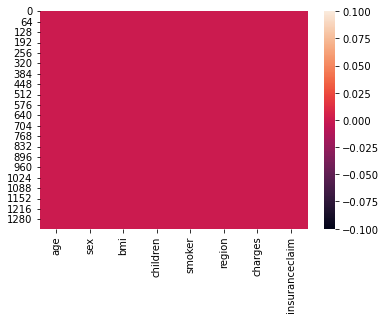

In [5]:
#check null values in visualise form using seaborn lib heatmap fn
sb.heatmap(df.isnull())
plt.show()
#there is no null values

In [6]:
#check how many rows and col
df.shape

(1338, 8)

In [7]:
#check datatypes
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [8]:
#check duplicated values
df.duplicated().sum()

1

In [9]:
#here 1 duplicated values 
#check this values
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [10]:
#to remove duplicated value
df.drop_duplicates(inplace=True)

In [11]:
#check again duplicated values
df.duplicated().sum()

0

In [12]:
#select input and output
X=df.drop('insuranceclaim',axis=1) #select input
Y=df['insuranceclaim'] #select output

In [13]:
#apply train test split to train the data 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [14]:
#apply standard scaler on input
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train,Y_train) #convert to numpy array
X_test=ss.transform(X_test) #convert to numpy array

In [15]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [16]:
#create fn
def create_model(model):
    
    #train the data with 70%
    model.fit(X_train,Y_train)
    
    #test the data with 30%
    Y_pred=model.predict(X_test)
    
    #to generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    
    return model

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
#to give dataset to LogisticRegression
from sklearn.linear_model import LogisticRegression

In [19]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [20]:
#call fn
lr=create_model(lr)
#here recall is 91% which is good 

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402

[[147  25]
 [ 21 209]]


In [21]:
#give dataset to DT by default gini
from sklearn.tree import DecisionTreeClassifier

In [22]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1)

In [23]:
#call fn
dt=create_model(dt)
#here recall is 96% 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402

[[168   4]
 [  9 221]]


In [24]:
#check IG
dict={"input":X.columns,"IG":dt.feature_importances_}
#convert to dataframe
df1=pd.DataFrame(dict)
#apply sorting
df1.sort_values("IG",ascending=False,ignore_index=True)
#here IG of children,bmi,smoker is good 

,input,IG
0,children,0.377550
1,bmi,0.330158
2,smoker,0.180860
3,age,0.082568
4,charges,0.028864
5,sex,0.000000
6,region,0.000000


In [25]:
#create object of DecisionTreeClassifier
dt1=DecisionTreeClassifier(random_state=1,max_depth=8)
#call fn
dt1=create_model(dt1)
#here recall is 94%

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       172
           1       0.96      0.94      0.95       230

    accuracy                           0.95       402
   macro avg       0.94      0.95      0.94       402
weighted avg       0.95      0.95      0.95       402

[[163   9]
 [ 13 217]]


In [26]:
#check IG
dict={"input":X.columns,"IG":dt1.feature_importances_}
#convert to dataframe
df2=pd.DataFrame(dict)
#sorting
df2.sort_values("IG",ascending=False,ignore_index=True)
#here children,bmi,smoker IG is good 

,input,IG
0,children,0.396539
1,bmi,0.300599
2,smoker,0.194738
3,age,0.081046
4,charges,0.027078
5,sex,0.000000
6,region,0.000000


In [27]:
#crate object of DecisionTreeClassifier
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call fn
dt2=create_model(dt2)
#here recall is 85%

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       172
           1       0.91      0.85      0.88       230

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402

[[153  19]
 [ 35 195]]


#draw tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(70,70))
_=tree.plot_tree(dt_entropy,feature_names=features,filled=True)
plt.show()

In [28]:
#give dataset to DT entropy
from sklearn.tree import DecisionTreeClassifier

In [29]:
#create object of DecisionTreeClassifier class
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [30]:
#call fn
dt_entropy=create_model(dt_entropy)
#here recall is 98% which is good 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       1.00      0.98      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402

[[171   1]
 [  4 226]]


#draw tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(70,70))
_=tree.plot_tree(dt_entropy,feature_names=features,filled=True)
plt.show()

In [31]:
#create object of DecisionTreeClassifier class
dt_entropy1=DecisionTreeClassifier(random_state=1,max_depth=7,criterion='entropy')
#call fn
dt_entropy1=create_model(dt_entropy1)
#here recall is 99%

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.99      0.99      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402

[[170   2]
 [  3 227]]


In [32]:
#check IG
dict={"input":X.columns,"IG":dt_entropy1.feature_importances_}
#convert to DataFrame
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)
#here bmi,children,smoker has good IG

,input,IG
0,bmi,0.444781
1,children,0.271510
2,smoker,0.158502
3,age,0.085557
4,charges,0.039650
5,sex,0.000000
6,region,0.000000


In [33]:
#apply second pruning Tech
#min_samples_leaf (entropy)
from sklearn.tree import DecisionTreeClassifier

In [34]:
#crate object of DecisionTreeClassifier
dt2_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=45)
#call fn
dt2_entropy=create_model(dt2_entropy)
#here recall is 86%

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       172
           1       0.94      0.86      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

[[160  12]
 [ 33 197]]


In [35]:
#check IG
dict={"input":X.columns,"IG":dt2_entropy.feature_importances_}
#convert to dataframe
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)
#here bmi,children,smoker IG is good

,input,IG
0,bmi,0.470769
1,children,0.297326
2,smoker,0.138001
3,age,0.069889
4,charges,0.024015
5,sex,0.000000
6,region,0.000000


In [36]:
#ensemble tech
#give dataset to Randomforest
from sklearn.ensemble import RandomForestClassifier

In [37]:
#create object RandomForestClassifier class by deafault gini 
rfc=RandomForestClassifier(random_state=1,n_estimators=23)
#call fn
rfc=create_model(rfc)
#here recall is 96%

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       172
           1       0.94      0.96      0.95       230

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402

[[159  13]
 [ 10 220]]


In [38]:
#check IG
dict={"input":X.columns,"IG":rfc.feature_importances_}
#convert to dataframe
df4=pd.DataFrame(dict)
#sorting
df4.sort_values("IG",ascending=False,ignore_index=True)
#here bmi,children,charges has more IG

,input,IG
0,bmi,0.355741
1,children,0.243664
2,charges,0.185629
3,age,0.097714
4,smoker,0.080570
5,region,0.024983
6,sex,0.011698


In [39]:
rfc1=RandomForestClassifier(n_estimators=23,random_state=1,max_depth=7) #bydefault gini
#call function 
rfc1=create_model(rfc1)
#here recall is 93%

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       172
           1       0.96      0.93      0.94       230

    accuracy                           0.94       402
   macro avg       0.93      0.94      0.93       402
weighted avg       0.94      0.94      0.94       402

[[162  10]
 [ 16 214]]


In [40]:
#check information gain :
dict={"input":X.columns,"IG":rfc1.feature_importances_}
#convert dict to dataframe
df2=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,bmi,0.361959
1,children,0.266157
2,charges,0.149398
3,smoker,0.116851
4,age,0.081448
5,region,0.016507
6,sex,0.007680


In [41]:
rfc2=RandomForestClassifier(n_estimators=23,random_state=1,min_samples_leaf=55) 

#by default gini index
#call fn
rfc2=create_model(rfc2)
#here recall is 90%

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       172
           1       0.86      0.90      0.88       230

    accuracy                           0.86       402
   macro avg       0.86      0.85      0.86       402
weighted avg       0.86      0.86      0.86       402

[[139  33]
 [ 23 207]]


In [42]:
#check information gain :
dict={"input":X.columns,"IG":rfc2.feature_importances_}
#convert dict to dataframe
df3=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df3.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,bmi,0.354092
1,children,0.254927
2,smoker,0.168592
3,charges,0.149655
4,age,0.060733
5,sex,0.007194
6,region,0.004807


In [43]:
#give dataset to next boosting tech
#1.adaboost
#n_estimators means no of decision stump
#ADA boost creates decison stump(means one root node and two leaf node)
#leaf node means no any child
from sklearn.ensemble import AdaBoostClassifier

In [44]:
X.shape

(1337, 7)

In [45]:
#create object of AdaBoostclassifier class
ada=AdaBoostClassifier(random_state=1,n_estimators=7)
#call fn
ada=create_model(ada)
#here recall is 90%
#hence all features are imp

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       172
           1       0.85      0.90      0.88       230

    accuracy                           0.85       402
   macro avg       0.85      0.85      0.85       402
weighted avg       0.85      0.85      0.85       402

[[136  36]
 [ 23 207]]


In [46]:
#check IG
#check information gain :
dict={"input":X.columns,"IG":ada.feature_importances_}
#convert dict to dataframe
df3=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df3.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,bmi,0.428571
1,children,0.285714
2,age,0.142857
3,smoker,0.142857
4,sex,0.000000
5,region,0.000000
6,charges,0.000000


In [47]:
#apply second boosting tech GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
#n_estimator >=10 and <=100

In [48]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=88)
#call fn
gbc=create_model(gbc)
#here recall is 98%

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       172
           1       0.96      0.98      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.96      0.96       402
weighted avg       0.97      0.97      0.97       402

[[163   9]
 [  5 225]]


In [49]:
#check IG
#check information gain :
dict={"input":X.columns,"IG":gbc.feature_importances_}
#convert dict to dataframe
df3=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df3.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,children,0.354891
1,bmi,0.324426
2,smoker,0.203479
3,charges,0.072293
4,age,0.044642
5,region,0.000239
6,sex,0.000031


In [50]:
#apply 3rd boosting tech extreme gradient boost
!pip install xgboost

In [51]:
from xgboost import XGBClassifier

In [52]:
 #crate object of XGBClassifier class
xgb=XGBClassifier(random_state=1,n_estimators=17)
#call fb
xgb=create_model(xgb)
#here recall is 99%

[17:54:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       172
           1       0.99      0.99      0.99       230

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402

[[169   3]
 [  3 227]]


In [53]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":xgb.feature_importances_}
#convert dict to dataframe
df3=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df3.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,smoker,0.385389
1,children,0.273664
2,bmi,0.142210
3,age,0.093992
4,sex,0.047888
5,charges,0.040867
6,region,0.015991


In [54]:
#apply KNN algo
from sklearn.neighbors import KNeighborsClassifier

In [55]:
#create object of KNeighborsClassifier class
#p=2 means Euclidean distance method 
knc=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)

In [56]:
#call fn
knc=create_model(knc)
#here recall is 91%

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       172
           1       0.90      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

[[149  23]
 [ 21 209]]


In [57]:
#apply support vector machine 
#1.give to linear svc
from sklearn.svm import LinearSVC

In [58]:
#create object of LinearSVC
svc=LinearSVC(random_state=1)

In [59]:
#call fn
svc=create_model(svc)
#here recall is 92%

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.89      0.92      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402

[[146  26]
 [ 19 211]]


In [60]:
#give data to kernal fn
from sklearn.svm import SVC
poly_svc=SVC(random_state=1,kernel="poly")

In [61]:
#call fn
poly_svc=create_model(poly_svc)
#here recall is 90%

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.93      0.90      0.91       230

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402

[[156  16]
 [ 24 206]]


In [62]:
#give data to rad
#give data to kernal fn
from sklearn.svm import SVC
rad_svc=SVC(random_state=1,kernel="rbf")

In [63]:
#call fn
rad_svc=create_model(rad_svc)
#here recall is 87%

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       172
           1       0.95      0.87      0.91       230

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402

[[161  11]
 [ 30 200]]


In [64]:
#so here recall is reduced so my data is linear